# Long Time, No Rih: A Twitter Sentiment Analysis of Rihanna’s Comeback Superbowl Halftime Performance.
## By Stephanie Netoafomachukwu Anyama.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#processing">Data Prepocessing</a></li>
<li><a href="#sentiment">Sentiment Analysis</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#inferences">Inferences</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction
Hi! I'm Neto Anyama. In this project, I performed a sentiment analysis of tweets covering Rihanna's comeback SuperBowl halftime performance, on 13th of February 2023. I analysed 33,488 tweets with 12 features, such as Tweet Content, Number of Likes, Number of Retweets etc.

#### Questions.
1. What are the tweets with the most engagements?
2. What is the overall sentiment of fans?
3. What tracks were most talked about by fans?
4. What were the most popular hashtags used by fans?
5. What were the most popular words used by fans?

Listen to the setlist [here](https://music.apple.com/us/playlist/rihannas-super-bowl-lvii-halftime-show-set-list/pl.2d5e38b2cdaa4417932784ff19cc4fbe). Here we go!

<a id='wrangling'></a>
## Data Wrangling
### Gathering

To gather the data, I scraped tweets using `Snscrape`. I opted against using Twitter's official API, Tweepy as the tweets I needed were older than the limit set by Twitter (7 days). I installed and imported this library, and others like `pandas`, `matplotlib` and `seaborn` for wrangling and visualization. For my sentiment analysis, I used the `nltk` library. Unlike Tweepy, I did not require to get any access keys with Snscrape. 

To create the word cloud containing the most frequently used words, I installed and imported the `wordcloud` library. To extract certain words from the dataframe, I used the `re` library. I also used the `random` library to create the function needed to generate the red colour for the Word CLoud.


In [234]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import textblob
from textblob import TextBlob

from wordcloud import WordCloud, ImageColorGenerator
from emot.emo_unicode import UNICODE_EMOJI # For emojis

import nltk
from nltk.corpus import stopwords # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to original form
from nltk.corpus import words # Get all words in english language

import string
import random

Time for scraping. I first created a list (data dictionary), tweets. Using the parameters described in the code block below, I specified that I was going to use snscrape's twitter scraper, as the library is capable of scraping across various social media platforms. I set my tweet limit to 50,000 tweets and the timeframe at 13-15th February. For each tweet, I obtained the username, date created, number of likes, number of retweets, number of replies, tweet source and the actual tweet content.

All of this was then loaded into a dataframe, `tweets_df`, which was then saved as a csv file, `tweets_rihanna.csv`.

In [39]:
# Creating list to append tweet data to
tweets = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#RihannaSuperBowl since:2023-02-13 until:2023-02-15').get_items()):
    if i>50000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.retweetCount, tweet.replyCount, tweet.lang,
                   tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(tweets, columns=["user", "date_created", "number_of_likes", "language", "number_of_retweets", "number_of_replies",
                                          "source_of_tweet", "tweet"])

C:\Users\netoa\AppData\Local\Temp/ipykernel_13024/4276019113.py:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet.sourceLabel, tweet.content])


In [40]:
tweets_df

,user,date_created,number_of_likes,language,number_of_retweets,number_of_replies,source_of_tweet,tweet
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...
...,...,...,...,...,...,...,...,...
38178,Niovel09,2023-02-13 00:01:23+00:00,1,1,0,es,Twitter for iPhone,"Ya empezó el Super Bowl, ¿a cuál equipo vas?\n..."
38179,WAVHistheMOC,2023-02-13 00:01:18+00:00,0,0,0,en,Twitter Web App,Game on!!!\n\n#SBLVII #SuperBowl #SuperBowlLVI...
38180,20Ethne,2023-02-13 00:01:16+00:00,1,0,0,pt,Twitter for iPhone,A minutos de volver a cantar contigooooo!!!!!!...
38181,Cami4_,2023-02-13 00:01:01+00:00,1,0,1,es,Twitter for iPhone,"Ese tiempo va en cuenta regresiva, así que sup..."


In [41]:
tweets_df.to_csv('tweets_rihanna.csv')

### Assessment
I carried out visual and programmatic assessments of my dataset to find any quality or tidiness issues that may interfere with my analysis.

#### Dataset Features.
1. User: The handle of the Twitter user.
2. Date Created: The date the tweet was created and posted.
3. Number of Likes: The amount of likes the tweet received.
4. Number of Retweets: The amount of retweets the tweet received.
5. Number of Replies: The amount of replies the tweet received.
6. Source of Tweet: The kind of device used in creating the tweet i.e. Twitter for iPhone, Twitter for Android etc.
7. Tweet: The actual tweet content, with emojis.

In [2]:
df = pd.read_csv('tweets_rihanna.csv', index_col=[0])
df.head()

,user,date_created,number_of_likes,language,number_of_retweets,number_of_replies,source_of_tweet,tweet
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38183 entries, 0 to 38182
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user                38183 non-null  object
 1   date_created        38183 non-null  object
 2   number_of_likes     38183 non-null  int64 
 3   language            38183 non-null  int64 
 4   number_of_retweets  38183 non-null  int64 
 5   number_of_replies   38183 non-null  object
 6   source_of_tweet     38183 non-null  object
 7   tweet               38183 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [44]:
sum(clean_df.duplicated())

0

In [3]:
df.shape

(38183, 8)

In total, I got 38,183 tweets. I noted that a number of my tweets scraped were in English, Spanish and Portuguese, so I kept them in the dataframe, and dropped others using the `query` command. I tried translating the Spanish and Portuguese tweets using the googletrans library, but was unable to. 

I observed that I'd make an error in naming the columns of the dataframe. The only other issue I observed to clean was the datatype of the `date_created` column, which needed to be changed from object to datetime. I then made a copy of the dataset for cleaning and preprocessing for further analysis.

In [272]:
clean_df = df.copy()

In [47]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38183 entries, 0 to 38182
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user                38183 non-null  object
 1   date_created        38183 non-null  object
 2   number_of_likes     38183 non-null  int64 
 3   language            38183 non-null  int64 
 4   number_of_retweets  38183 non-null  int64 
 5   number_of_replies   38183 non-null  object
 6   source_of_tweet     38183 non-null  object
 7   tweet               38183 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


### Cleaning
I made a copy of the dataset, `clean_df` for cleaning and preprocessing for further analysis.

##### Define:
Convert `date_created` from object to datetime.

##### Code: 

In [273]:
clean_df = clean_df.astype({"date_created":"datetime64[ns]"})

##### Test:

In [49]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38183 entries, 0 to 38182
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user                38183 non-null  object        
 1   date_created        38183 non-null  datetime64[ns]
 2   number_of_likes     38183 non-null  int64         
 3   language            38183 non-null  int64         
 4   number_of_retweets  38183 non-null  int64         
 5   number_of_replies   38183 non-null  object        
 6   source_of_tweet     38183 non-null  object        
 7   tweet               38183 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.6+ MB


##### Define:
Rename `language`, `number_of_retweets` and `number_of_replies` to `number_of_retweets`, `number_of_replies` and `language`, respectively.

##### Code: 

In [274]:
clean_df.rename(columns={'language':'number_of_retweets', 'number_of_retweets' : 'number_of_replies',
             'number_of_replies' : 'language'}, inplace=True)

##### Test:

In [275]:
clean_df

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet
0,nouvel_chotv,2023-02-14 23:58:31,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...
1,cabpontocampos,2023-02-14 23:50:51,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...
4,ali_ges,2023-02-14 23:48:06,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...
...,...,...,...,...,...,...,...,...
38178,Niovel09,2023-02-13 00:01:23,1,1,0,es,Twitter for iPhone,"Ya empezó el Super Bowl, ¿a cuál equipo vas?\n..."
38179,WAVHistheMOC,2023-02-13 00:01:18,0,0,0,en,Twitter Web App,Game on!!!\n\n#SBLVII #SuperBowl #SuperBowlLVI...
38180,20Ethne,2023-02-13 00:01:16,1,0,0,pt,Twitter for iPhone,A minutos de volver a cantar contigooooo!!!!!!...
38181,Cami4_,2023-02-13 00:01:01,1,0,1,es,Twitter for iPhone,"Ese tiempo va en cuenta regresiva, así que sup..."


##### Define:
Find the top 3 languages used and create a final dataframe, `final_df`, to be used for analysis.

##### Code: 

In [28]:
clean_df.language.value_counts()

en     19963
es      7352
pt      6173
qme     1135
und      775
fr       716
it       349
qht      318
in       241
is       198
tl       143
ja        77
th        72
de        68
ca        68
ht        64
et        57
ur        52
hi        51
fi        41
pl        31
tr        26
cy        24
da        22
ro        20
nl        19
sv        18
ar        16
el        14
hu        13
no        11
sl         9
lt         8
eu         8
zh         7
ru         5
cs         4
fa         2
uk         2
bn         2
mr         2
ta         1
iw         1
bg         1
kn         1
pa         1
ko         1
lv         1
Name: language, dtype: int64

In [276]:
final_df = clean_df.query('language == ["en", "es", "pt"]')

##### Test:

In [277]:
final_df

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet
1,cabpontocampos,2023-02-14 23:50:51,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...
4,ali_ges,2023-02-14 23:48:06,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...
5,ColinJWarnock,2023-02-14 23:42:50,3,0,0,en,Twitter for Android,I imagine when the #GOP is finished being outr...
...,...,...,...,...,...,...,...,...
38178,Niovel09,2023-02-13 00:01:23,1,1,0,es,Twitter for iPhone,"Ya empezó el Super Bowl, ¿a cuál equipo vas?\n..."
38179,WAVHistheMOC,2023-02-13 00:01:18,0,0,0,en,Twitter Web App,Game on!!!\n\n#SBLVII #SuperBowl #SuperBowlLVI...
38180,20Ethne,2023-02-13 00:01:16,1,0,0,pt,Twitter for iPhone,A minutos de volver a cantar contigooooo!!!!!!...
38181,Cami4_,2023-02-13 00:01:01,1,0,1,es,Twitter for iPhone,"Ese tiempo va en cuenta regresiva, así que sup..."


In the end, I was left with 33,488 tweets to analyze.

<a id='processing'></a>
## Data Preprocessing.

This refers to all data cleaning done in preparing tweets for sentiment analysis. To do this, I created several functions which I applied to the 'tweet' column in my `final_df` dataframe to produce desired results. Properly preprocessing data results in more accurate downstream processes.

Also, for my wordcloud, I wanted to show the words used to describe the performance, so I created a function to extract some positive words to a new column.

In [16]:
#defining a function to detect and extract hashtags in each tweet
def hashtaglist(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [17]:
#applying the function and creating a new column containing the extracted hashtags
final_df['hashtags'] = final_df['tweet'].apply(hashtaglist)
final_df.head()

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...,#nouvel_chotv #rihannasuperbowl
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl


In [18]:
#creating a list of unique hashtags from the appropriate column
hashtag_list = final_df['hashtags'].unique()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
all_hashtags = []
for hashtag in hashtag_list:
    hashtag = hashtag.split()
    for i in hashtag:
        all_hashtags.append(i)

# Importing Counter module from Collections library to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts = Counter(all_hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  6857


In [53]:
#saving hashtag dataframe to csv file
hashtags_df.to_csv('hts.csv')

In [9]:
hashtags_df.head()

,hashtags,count
1,#rihannasuperbowl,9133
2,#rihanna,5361
4,#superbowl,3530
23,#superbowllvii,2668
48,#halftimeshow,1313


In [19]:
# Defining a function
def LowerCaseTweets(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    return tweet

In [20]:
# Get tweets in lower case and store as tweet_lowercase
final_df['tweet_lowercase'] = final_df['tweet'].apply(LowerCaseTweets)
final_df.head()

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...,#nouvel_chotv #rihannasuperbowl,rihanna confirme qu'elle est enceinte de son 2...
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...


In [100]:
#writing out the setlist for the performance
tracks = ['diamonds', 'bitchbetterhavemymoney', 'wildthoughts', 'work', 'rudeboy', 'sm',
         'onlygirlintheworld', 'wherehaveyoubeen', 'wefoundlove', 'pouritup', 'allofthelights', 'runthistown', 'umbrella']

print(len(tracks))

13


In [23]:
# Define function to replace track names as one word track name in a new column tweet_track
def mentioned_tracks(track):
    replacements = [('bitch better have my money', 'bitchbetterhavemymoney'), ('wild thoughts', 'wildthoughts'),
                 ('rude boy','rudeboy'), ('only girl in the world','onlygirlintheworld'), 
                ('where have you been', 'wherehaveyoubeen'), ('we found love','wefoundlove'), ('s & m', 'sm'),
                ('s&m', 'sm'), ('pour it up', 'pouritup'), 
                ('all of the lights', 'allofthelights'), ('run this town', 'runthistown')]
                                                                               
    for pat,repl in replacements:
        track = re.sub(pat, repl, track)
    return track
final_df['tweet_track'] = final_df['tweet_lowercase'].apply(mentioned_tracks)
final_df.head()            

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...,#nouvel_chotv #rihannasuperbowl,rihanna confirme qu'elle est enceinte de son 2...,rihanna confirme qu'elle est enceinte de son 2...
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...


In [24]:
# Define function to extract set list track from each tweet_track
def getTrack(tweet_track):
    tweet_track = tweet_track.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(tweet_track) #splits each word in tweet_track for parsing
    rih_track = [char for char in tweet_tokens if char in tracks] 
    return " ".join(rih_track)

In [25]:
# Extract tracks to a new column
final_df['track'] = final_df['tweet_track'].apply(getTrack)
final_df.head()

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track,track
0,nouvel_chotv,2023-02-14 23:58:31+00:00,2,0,0,fr,Twitter for Android,Rihanna confirme qu'elle est enceinte de son 2...,#nouvel_chotv #rihannasuperbowl,rihanna confirme qu'elle est enceinte de son 2...,rihanna confirme qu'elle est enceinte de son 2...,
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...,
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri...",
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...,
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...,


In [26]:
#store tracks in a list
track_list = final_df['track'].unique()

# Iterate over all tracks and split where there is more than one track per row of data
all_tracks = []
for track in track_list:
    track = track.split()
    for i in track:
        all_tracks.append(i)

# Importing Collection module to determine unique count of all tracks used
from collections import Counter

# Determine Unique count of all tracks mentioned
counts = Counter(all_tracks)
tracks_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
tracks_df.columns = ['track', 'count']
tracks_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Tracks is: ", tracks_df.shape[0])

The Total Number of Unique Tracks is:  13


In [108]:
tracks_df

,track,count
4,work,45
7,umbrella,36
0,diamonds,24
3,rudeboy,21
2,wefoundlove,17
8,allofthelights,17
5,pouritup,14
11,runthistown,14
1,wherehaveyoubeen,11
6,wildthoughts,7


In [64]:
#saving df to csv file
tracks_df.to_csv('Rih_Track.csv')

In [31]:
#creating list of positive words
positive_words = ['love', 'choreography', 'queen', 'iconic', 'happy', 'rocky', 'kill', 'transition', 'transitions', 
                  'fenty', 'stage', 'dance', 'pregnant', 'hits', 'amazing', 'best', 'energy', 'excited']

In [32]:
# Define function to replace Positive words as one word Positive words in a new column tweet_positive_words
def positiveWords(ren_positive_words):
    replacements = [('amo', 'love'), ('coreografia','choreography'), ('rainha','queen'), ('transiciones', 'transitions'),
    ('iconica', 'iconic'), ('escenario','stage'), ('icono','icon'), ('dançando', 'dance'), ('baile', 'dance'),
    ('dançou','dance'), ('embarazada', 'pregnant'), ('gravida','pregnant'), ('preñada', 'pregnant'), ('asombrosa','amazing'),
    ('incrível', 'amazing'), ('awesome', 'amazing'), ('icon','iconic'), ('greatest','best'), ('mejor','best'), ('melhor', 'best'),
                   ('emocionada','excited'), ('excitement','excited')]
    for pat,repl in replacements:
        ren_positive_words = re.sub(pat, repl, ren_positive_words)
    return ren_positive_words
final_df['tweet_positive_words'] = final_df['tweet_lowercase'].apply(positiveWords)
final_df.head()

C:\Users\netoa\AppData\Local\Temp/ipykernel_19624/3272879987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tweet_positive_words'] = final_df['tweet_lowercase'].apply(positiveWords)


,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...,,a arte me salva de dormir na aula de vez em qu...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri...",,"must be that ""amber voodoo"" 😂 great job, @ri..."
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...,,rihanna é uma deusa e quem não concordar é ate...
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...,,anyone who said this was the worst superbowl p...
5,ColinJWarnock,2023-02-14 23:42:50+00:00,3,0,0,en,Twitter for Android,I imagine when the #GOP is finished being outr...,#gop #rihannasuperbowl #80forbrady #janefonda ...,i imagine when the #gop is finished being outr...,i imagine when the #gop is finished being outr...,,i imagine when the #gop is finished being outr...


In [33]:
# Define function to extract Positive words from each Tweet
def getPositiveWord(tweet_positive_words):
    tweet_positive_words = tweet_positive_words.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(tweet_positive_words) #splits each word in tweet_track for parsing
    rih_positive_words = [char for char in tweet_tokens if char in positive_words] 
    return " ".join(rih_positive_words)

In [34]:
# Extract Positive words to a new column
final_df['positive_words'] = final_df['tweet_positive_words'].apply(getPositiveWord)
final_df.head()

C:\Users\netoa\AppData\Local\Temp/ipykernel_19624/1130823898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['positive_words'] = final_df['tweet_positive_words'].apply(getPositiveWord)


,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...,,a arte me salva de dormir na aula de vez em qu...,
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri...",,"must be that ""amber voodoo"" 😂 great job, @ri...",
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...,,rihanna é uma deusa e quem não concordar é ate...,
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...,,anyone who said this was the worst superbowl p...,
5,ColinJWarnock,2023-02-14 23:42:50+00:00,3,0,0,en,Twitter for Android,I imagine when the #GOP is finished being outr...,#gop #rihannasuperbowl #80forbrady #janefonda ...,i imagine when the #gop is finished being outr...,i imagine when the #gop is finished being outr...,,i imagine when the #gop is finished being outr...,


In [36]:
# Store positive words in a list
pos_list = final_df['positive_words'].tolist()

# Iterate over all cast names and split where there is more than one cast
pos = []
for item in pos_list:
    item = item.split()
    for i in item:
        pos.append(i)

# Determine Unique count of all cast
counts = Counter(pos)
positive_words_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
positive_words_df.columns = ['Positive_Words', 'Count']
positive_words_df.sort_values(by='Count', ascending=False, inplace=True)
positive_words_df

,Positive_Words,Count
6,pregnant,3249
2,love,1299
9,best,808
4,amazing,669
0,queen,660
8,stage,525
1,fenty,346
5,hits,312
3,happy,216
13,rocky,194


In [190]:
# saving positive words dataframe to a csv file
positive_words_df.to_csv('Rih_Positive_Words.csv')

In [39]:
# Defining my NLTK stop words
stopwords_en = nltk.corpus.stopwords.words("english")
stopwords_es = nltk.corpus.stopwords.words("spanish")
stopwords_pt = nltk.corpus.stopwords.words("portuguese")

# The list below are common words which will not be relevant in our analysis.
common_words = ['rihanna', 'rih', "rihanna's"]
alphabets = list(string.ascii_lowercase)
stop_words = stopwords_en + stopwords_es + stopwords_pt + alphabets + common_words + tracks

In [40]:
emojis = list(UNICODE_EMOJI.keys())

In [41]:
# preprocess tweet for sentiment analysis
def preprocessTweets(tweet):
    tweet = tweet.lower()
    # Cleaning and removing URL’s
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)
    # Cleaning and removing repeating characters
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)
    # Cleaning and removing the above stop words list from the tweet text
    tweet_tokens = word_tokenize(tweet)  
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    # Cleaning and removing punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [44]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
final_df['Processed_Tweets'] = final_df['tweet'].apply(preprocessTweets)
final_df.head()

C:\Users\netoa\AppData\Local\Temp/ipykernel_19624/2809498028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Processed_Tweets'] = final_df['tweet'].apply(preprocessTweets)


,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words,Processed_Tweets
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...,,a arte me salva de dormir na aula de vez em qu...,,arte salva dormir aula vez fanart pra curtiu p...
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri...",,"must be that ""amber voodoo"" 😂 great job, @ri...",,must `` amber voodoo '' great job
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...,,rihanna é uma deusa e quem não concordar é ate...,,deusa concordar ateu
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...,,anyone who said this was the worst superbowl p...,,anyone said worst superbowl performance must s...
5,ColinJWarnock,2023-02-14 23:42:50+00:00,3,0,0,en,Twitter for Android,I imagine when the #GOP is finished being outr...,#gop #rihannasuperbowl #80forbrady #janefonda ...,i imagine when the #gop is finished being outr...,i imagine when the #gop is finished being outr...,,i imagine when the #gop is finished being outr...,,imagine finished outraged performance turn fau...


In [45]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = final_df['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

<a id='sentiment'></a>
## Sentiment Analysis
Now that the tweets have been processed, I showed the sentiments in relation to the Performance. I'm going to employ the use of Text Blob


In [46]:
# Define function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [47]:
# Apply the functions to respective columns
final_df['Polarity']=final_df['Processed_Tweets'].apply(getPolarity)
final_df['Sentiment']=final_df['Polarity'].apply(getSentimentTextBlob)

C:\Users\netoa\AppData\Local\Temp/ipykernel_19624/2958364944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Polarity']=final_df['Processed_Tweets'].apply(getPolarity)
C:\Users\netoa\AppData\Local\Temp/ipykernel_19624/2958364944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sentiment']=final_df['Polarity'].apply(getSentimentTextBlob)


In [48]:
final_df.head()

,user,date_created,number_of_likes,number_of_retweets,number_of_replies,language,source_of_tweet,tweet,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words,Processed_Tweets,Polarity,Sentiment
1,cabpontocampos,2023-02-14 23:50:51+00:00,24,3,5,pt,Twitter for Android,A arte me salva de dormir na aula de vez em qu...,#rihanna #rihannasuperbowl #rihannapregnant #s...,a arte me salva de dormir na aula de vez em qu...,a arte me salva de dormir na aula de vez em qu...,,a arte me salva de dormir na aula de vez em qu...,,arte salva dormir aula vez fanart pra curtiu p...,0.0,Positive
2,Cat24The24,2023-02-14 23:50:18+00:00,2,1,0,en,Twitter for Android,"Must be that ""Amber voodoo"" 😂 Great job, @ri...",#rihannasuperbowl #rihannareturns #johnnydeppi...,"must be that ""amber voodoo"" 😂 great job, @ri...","must be that ""amber voodoo"" 😂 great job, @ri...",,"must be that ""amber voodoo"" 😂 great job, @ri...",,must `` amber voodoo '' great job,0.8,Positive
3,a_mar_o,2023-02-14 23:48:42+00:00,9,2,0,pt,Twitter for Android,Rihanna é uma deusa e quem não concordar é Ate...,#rihannasuperbowl #rihanna,rihanna é uma deusa e quem não concordar é ate...,rihanna é uma deusa e quem não concordar é ate...,,rihanna é uma deusa e quem não concordar é ate...,,deusa concordar ateu,0.0,Positive
4,ali_ges,2023-02-14 23:48:06+00:00,0,0,0,en,Twitter for Android,Anyone who said this was the worst Superbowl p...,#rihannasuperbowl,anyone who said this was the worst superbowl p...,anyone who said this was the worst superbowl p...,,anyone who said this was the worst superbowl p...,,anyone said worst superbowl performance must s...,-1.0,Negative
5,ColinJWarnock,2023-02-14 23:42:50+00:00,3,0,0,en,Twitter for Android,I imagine when the #GOP is finished being outr...,#gop #rihannasuperbowl #80forbrady #janefonda ...,i imagine when the #gop is finished being outr...,i imagine when the #gop is finished being outr...,,i imagine when the #gop is finished being outr...,,imagine finished outraged performance turn fau...,-0.8,Negative


In [49]:
# get unique values and count in sentiment column
final_df['Sentiment'].value_counts()

Positive    30997
Negative     2491
Name: Sentiment, dtype: int64

In [101]:
final_df['Sentiment'].value_counts(normalize=True)

Positive    0.925615
Negative    0.074385
Name: Sentiment, dtype: float64

In [70]:
#saving the final dataframe into a csv file
final_df.to_csv("Rihanna_Final.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis.

In [51]:
data = final_df['Sentiment'].value_counts()
data

Positive    30997
Negative     2491
Name: Sentiment, dtype: int64

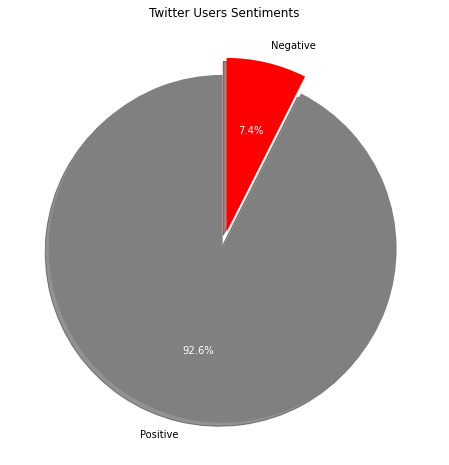

In [261]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[10,8], facecolor='none')
patches, texts,autotexts = plt.pie(data, labels=['Positive', 'Negative'], colors=['grey','#FF0000'], startangle=90, explode= [0.05, 0.05], shadow=True,
        autopct='%1.1f%%');

for autotext in autotexts:
    autotext.set_color('#FFFFFF')
    
plt.title('Twitter Users Sentiments');

plt.savefig("Sentiments.png", format="png");

In [162]:
#creating a unique list of all tracks tweeted about
songs = final_df['track'].unique()

In [133]:
#creating a unique list of the counts all tracks tweeted about
popular = final_df['track'].value_counts()
popular

                                                                                                                32230
umbrella                                                                                                          301
diamonds                                                                                                          240
work                                                                                                              132
bitchbetterhavemymoney                                                                                            105
                                                                                                                ...  
pouritup wildthoughts wherehaveyoubeen                                                                              1
wherehaveyoubeen wefoundlove rudeboy work wildthoughts pouritup allofthelights runthistown umbrella diamonds        1
pouritup wherehaveyoubeen umbrella allofthelights       

In [139]:
#appending both lists to a dataframe
list_df = pd.DataFrame(
    {'song':songs,
     'number': popular})

In [137]:
#saving dataframe to be manually cleaned in Excel
list_df.to_csv("popular.csv", index=False)

In [185]:
#cleaned dataframe containing the actual count of all tracks mentioned
ordered_tracks = pd.read_csv('/Users/netoa/Downloads/popular_cleaned.csv')
ordered_tracks

,song,number
0,diamonds,358
1,wherehaveyoubeen,353
2,wefoundlove,273
3,work,186
4,pouritup,106
5,umbrella,101
6,wildthoughts,64
7,rudeboy,64
8,allofthelights,53
9,bitchbetterhavemymoney,33


In [212]:
#writing a function to show values in bar charts to be plotted
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

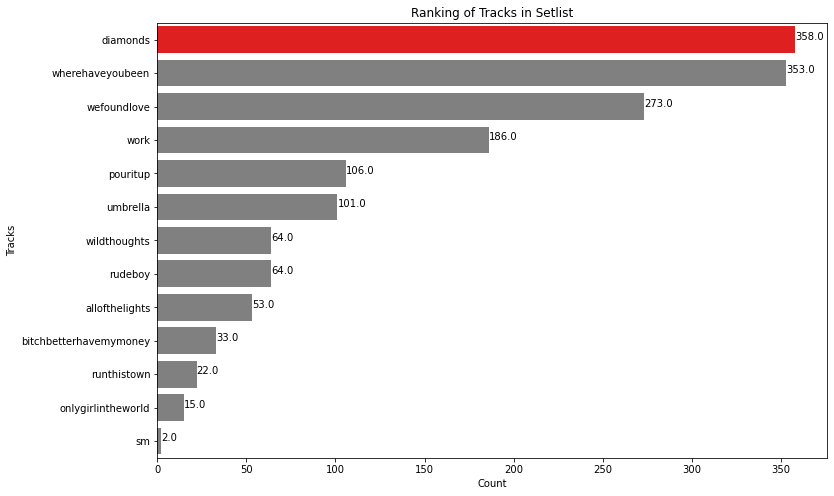

In [239]:
#plotting a bar chart of tracks by number of mentions
cols = ['grey' if (x < max(ordered_tracks.number)) else '#FF0000' for x in ordered_tracks.number]
plt.figure(figsize=[12,8])
t = sb.barplot(x ='number', y='song', data=ordered_tracks, orient='h', palette=cols);
plt.ylabel('Tracks')
plt.xlabel('Count')
plt.title('Ranking of Tracks in Setlist');

show_values(t, "h", space=0.08)

#saving the visualization
plt.savefig("Tracks.png", format="png");

##### The three most popular tracks were Diamonds, Where Have You Been and We Found Love. The least popular track was S&M (which is a song I love)

In [216]:
top_8 = hashtags_df.head(8)

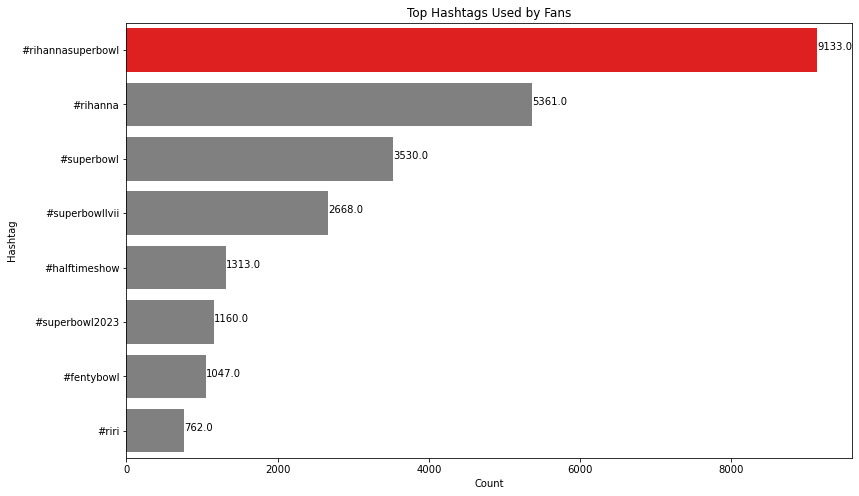

In [238]:
#plotting a bar chart of top 8 hashtags by number of mentions
colors = ['#FF0000', 'grey','grey','grey','grey','grey','grey','grey','grey','grey']
plt.figure(figsize=[13,8])
h = sb.barplot(x ='count', y='hashtags', data=top_8, orient='h', palette=colors);
plt.ylabel('Hashtag')
plt.xlabel('Count')
plt.title('Top Hashtags Used by Fans');

show_values(h, "h", space=0.05)

#saving the visualization
plt.savefig("Hashtags.png", format="png");

##### The official hashtag for the event was #RihannaSuperBowl. This hashtag was used **9,133 times (18.87%)**. Fans also often used #Rihanna **5,361 times (11.08%)**.

In [225]:
# Create function to generate the red colour for the Word CLoud
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(50, 80)

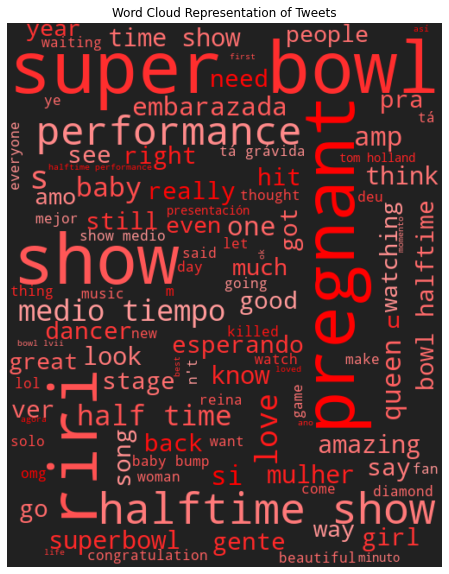

<Figure size 432x288 with 0 Axes>

In [237]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='#212121', mask=mask, max_words=100)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
plt.figure(figsize=[10,10], facecolor='none')


plt.imshow(twitter_wc.recolor(color_func = red_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud Representation of Tweets');
plt.show()

#saving the visualization
plt.savefig("WordCloud.png", format="png");

##### As seen in the word cloud above, the words most used were Super Bowl, pregnant and Riri. Fans clearly loved talking about the pregnancy.

<a id='inferences'></a>
## Inferences
1. Engagements were high with 319,446 likes, 40,857 retweets, 11942 replies in total, spread over 27,289 unique users.
2. **92.6%** of fans showed positive sentiments towards the performance.
3. ‘Diamonds’ was the song most talked about, showing up in 358 (21.96%) of tweets where fans mentioned any tracks.
4. By far, the most talked about portion of the performance was the news of Rihanna's pregnancy as it was mentioned 3,249 times.
5. Apart from the official #RihannaSuperBowl official hashtag used **9133 times (18.87%)**, fans also used #Rihanna **5361 times (11.08%)**.

<a id='references'></a>
## References
1. https://www.freecodecamp.org/news/python-web-scraping-tutorial/#:~:text=Just%20remember%20that%20there%20is,7%20days%20old%20using%20Tweepy.
2. https://github.com/Nonso-Analytics/Beyonce-Renaissance-A-Twitter-Sentiment-Analysis/blob/master/Beyonce's%20Renaissance%20-%20Twitter%20Sentiment%20Analysis.ipynb
3. https://music.apple.com/us/playlist/rihannas-super-bowl-lvii-halftime-show-set-list/pl.2d5e38b2cdaa4417932784ff19cc4fbe
4. https://www.pinterest.com/pin/816699713663013584/
5. https://www.statology.org/seaborn-barplot-show-values/
6. https://www.statology.org/seaborn-barplot-color/
7. https://www.color-hex.com/color/ff0000#:~:text=%23ff0000%20color%20RGB%20value%20is,of%20its%20RGB%20is%200.